In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [250]:
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

# Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 


1. Age : **해당 직원의 나이**
2. Attrition : **퇴직 여부 Target값 (종속변수)**
3. BusinessTravel : **출장의 빈도**
4. DailyRate : **일 대비 급여의 수준**
5. Department : **업무분야**
6. DistanceFromHome : **집과의 거리**
7. Education : **교육의 정도**
8. EducationField : **전공**
9. EmployeeCount : **직원 숫자**
10. EmployeeNumber : **직원 ID**
11. EnvironmentSatisfaction : **업무 환경에 대한 만족도**
12. Gender : **성별**
13. HourlyRate : **시간 대비 급여의 수준**
14. JobInvolvement : **업무 참여도**
15. JobLevel : **업무의 수준**
16. JobRole : **업무 종류**
17. JobSatisfaction : **업무 만족도**
18. MaritalStatus : **결혼 여부**
19. MonthlyIncome : **월 소득**
20. MonthlyRate : **월 대비 급여 수준**
21. NumCompaniesWorked : **일한 회사의 수**
22. Over18 : **18세 이상**
23. OverTime : **규정외 노동시간**
24. PercentSalaryHike : **급여의 증가분 백분율**
25. PerformanceRating : **업무 성과**
26. RelationshipSatisfaction : **대인관계 만족도**
27. StandardHours : **표준 시간**
28. StockOptionLevel : **스톡옵션 정도**
29. TotalWorkingYears : **경력 기간**
30. TrainingTimesLastYear : **교육 시간**
31. WorkLifeBalance : **일과 생활의 균형 정도**
32. YearsAtCompany : **근속 연수**
33. YearsInCurrentRole : **현재 역할의 년수**
34. YearsSinceLastPromotion : **마지막 프로모션**
35. YearsWithCurrManager : **현재 관리자와 함께 보낸 시간**

# 자료읽기

In [2]:
data = pd.read_csv("Tobigs/week1_EDA/과제/assignment_data.csv", encoding="UTF8")
original = copy.deepcopy(data)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
501,30,No,Travel_Frequently,160,Research & Development,3,3,Medical,1,680,...,3,80,1,1,2,3,1,0,0,0
145,30,No,Travel_Rarely,201,Research & Development,5,3,Technical Degree,1,197,...,4,80,1,8,3,3,3,2,2,2
731,20,Yes,Travel_Rarely,1097,Research & Development,11,3,Medical,1,1016,...,1,80,0,1,2,3,1,0,0,0
804,48,No,Non-Travel,1262,Research & Development,1,4,Medical,1,1116,...,3,80,0,27,3,2,5,4,2,1
203,40,No,Travel_Rarely,905,Research & Development,19,2,Medical,1,281,...,3,80,1,15,2,4,7,2,3,7
1373,38,No,Travel_Frequently,1394,Research & Development,8,3,Medical,1,1937,...,3,80,1,20,3,3,20,11,0,7
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
1293,43,No,Non-Travel,343,Research & Development,9,3,Life Sciences,1,1813,...,3,80,0,7,2,2,3,2,1,2
1406,54,No,Travel_Rarely,157,Research & Development,10,3,Medical,1,1980,...,4,80,0,9,3,3,5,2,1,4
641,32,No,Travel_Frequently,379,Sales,5,2,Life Sciences,1,889,...,4,80,1,10,3,3,10,8,5,3


# 결측

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치 없음.

# 전처리
* 이산형 변수 (범주형 + 순서형)를 factor화

In [10]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical = ['Attrition', 'BusinessTravel', 'EmployeeNumber', 'Department','EducationField', 'Gender', 'JobRole','MaritalStatus', 'Over18', 'OverTime']
ordinal = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement','JobLevel', 'JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

print('Number of Numerical features:', len(numerical))
print('Number of Categorical features:', len(categorical))
print('Number of Ordinal features:', len(ordinal))
print('Number of Total features:', len(numerical) + len(categorical) + len(ordinal))

Number of Numerical features: 16
Number of Categorical features: 10
Number of Ordinal features: 9
Number of Total features: 35


In [268]:
discrete = categorical + ordinal # 이산형 변수

In [11]:
# print('season: {}'.format(len(np.unique(data.season))))
np.unique(data['Attrition'])

array(['No', 'Yes'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical:
    data[col] = encoder.fit_transform(data[col].values)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,4,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# EDA

## 단변량 탐색

In [14]:
data[numerical].describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
data[ordinal].describe()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.912925,2.721769,2.729932,2.063946,2.728571,3.153741,2.712245,0.793878,2.761224
std,1.024165,1.093082,0.711561,1.106940,1.102846,0.360824,1.081209,0.852077,0.706476
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,1.000000,3.000000
max,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000


In [264]:
print(style.BOLD + '범주형 데이터 features' + style.END, '\n')
for col in original.columns:
    if original[col].dtype == 'object':
        categories = original[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

범주형 데이터 features 

[Attrition] (2)
Yes
No

[BusinessTravel] (3)
Travel_Rarely
Travel_Frequently
Non-Travel

[Department] (3)
Sales
Research & Development
Human Resources

[EducationField] (6)
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources

[Gender] (2)
Female
Male

[JobRole] (9)
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources

[MaritalStatus] (3)
Single
Married
Divorced

[Over18] (1)
Y

[OverTime] (2)
Yes
No



### 종속변수 확인

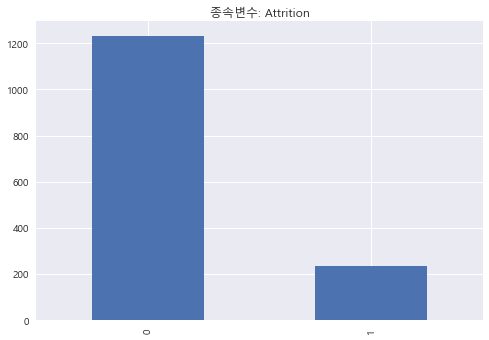

In [16]:
data['Attrition'].value_counts().plot(kind='bar')
plt.title('종속변수: Attrition')
plt.show()

In [218]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [216]:
print('퇴직한 사람 수:',data['Attrition'].value_counts()[1])
print('퇴직률:',round(data['Attrition'].value_counts()[1]/len(data)*100,1),'%')

퇴직한 사람 수: 237
퇴직률: 16.1 %


### 이산형 변수 탐색
* 범주형 + 순서형

In [276]:
len(discrete)

18

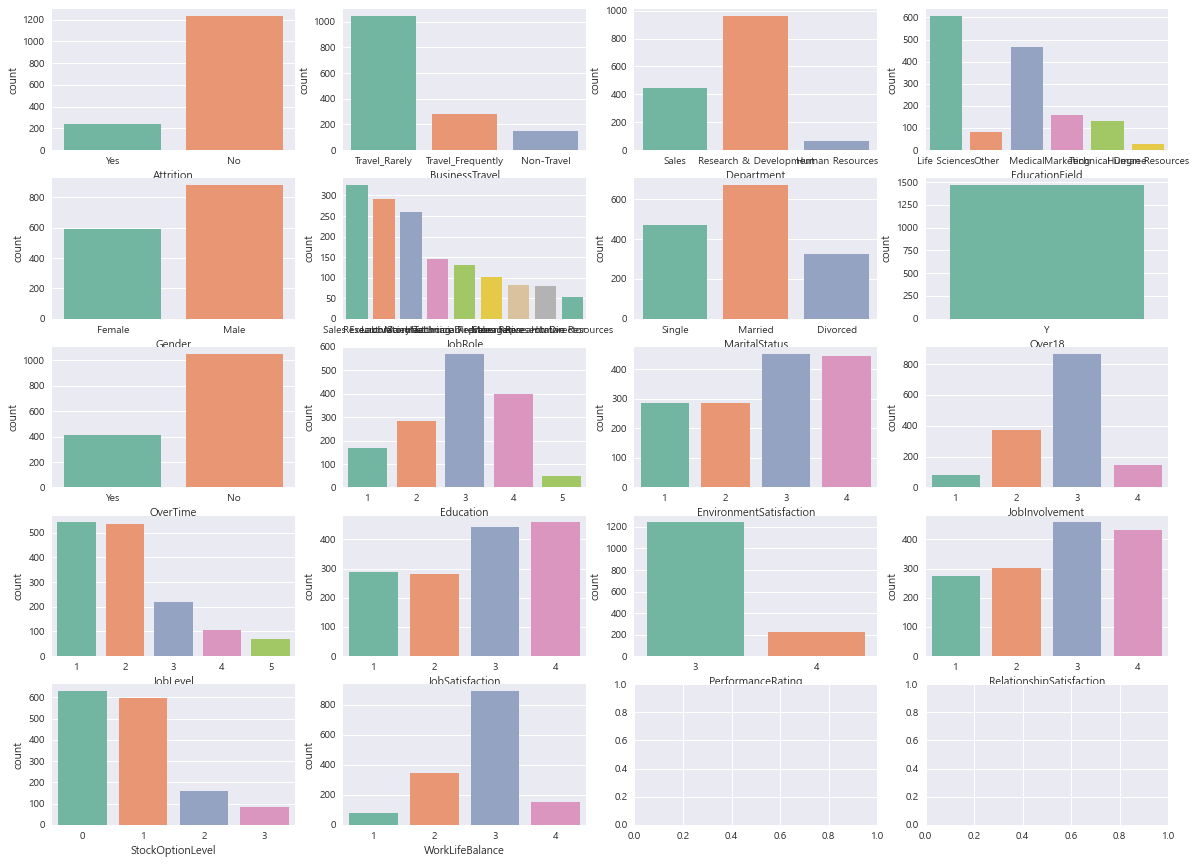

In [512]:
f, axes = plt.subplots(5, 4, figsize = (20, 15))

i = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4]
j = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1]

x=0
y=0
for col in discrete:
    sns.countplot(x=original[col], data=original, palette='Set2', ax=axes[i[x],j[y]])
    x+=1
    y+=1

### 수치형 변수 탬색

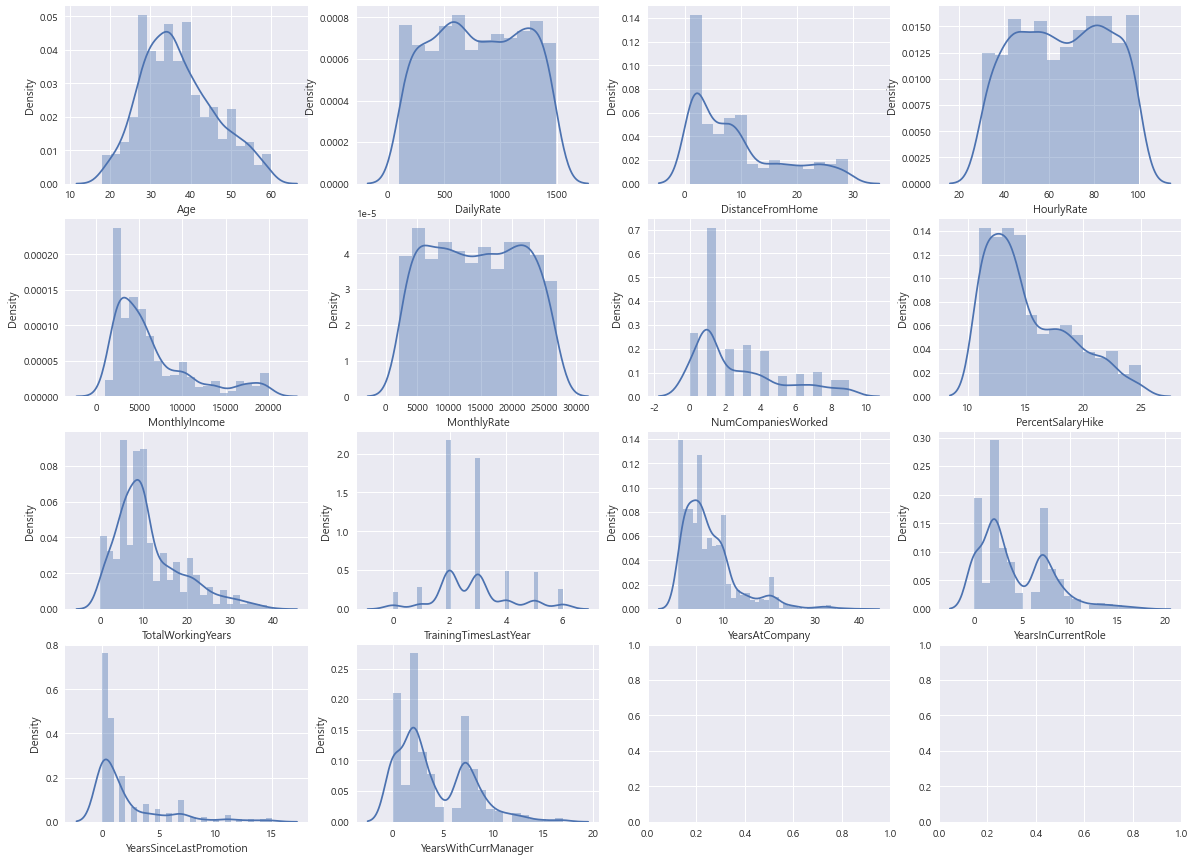

In [511]:
f, axes = plt.subplots(4, 4, figsize = (20, 15))

i = [0,0,0,0,1,1,1,1,2,2,2,2,3,3]
j = [0,1,2,3,0,1,2,3,0,1,2,3,0,1]

x = 0
y = 0
for col in numerical:
    sns.distplot(data[col], ax=axes[i[x],j[y]])
    x += 1
    y += 1

## 이변량 탐색

### 이산 ~ 이산

In [230]:
att = original['Attrition'] == 'Yes'
att_df = original[att]
att_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


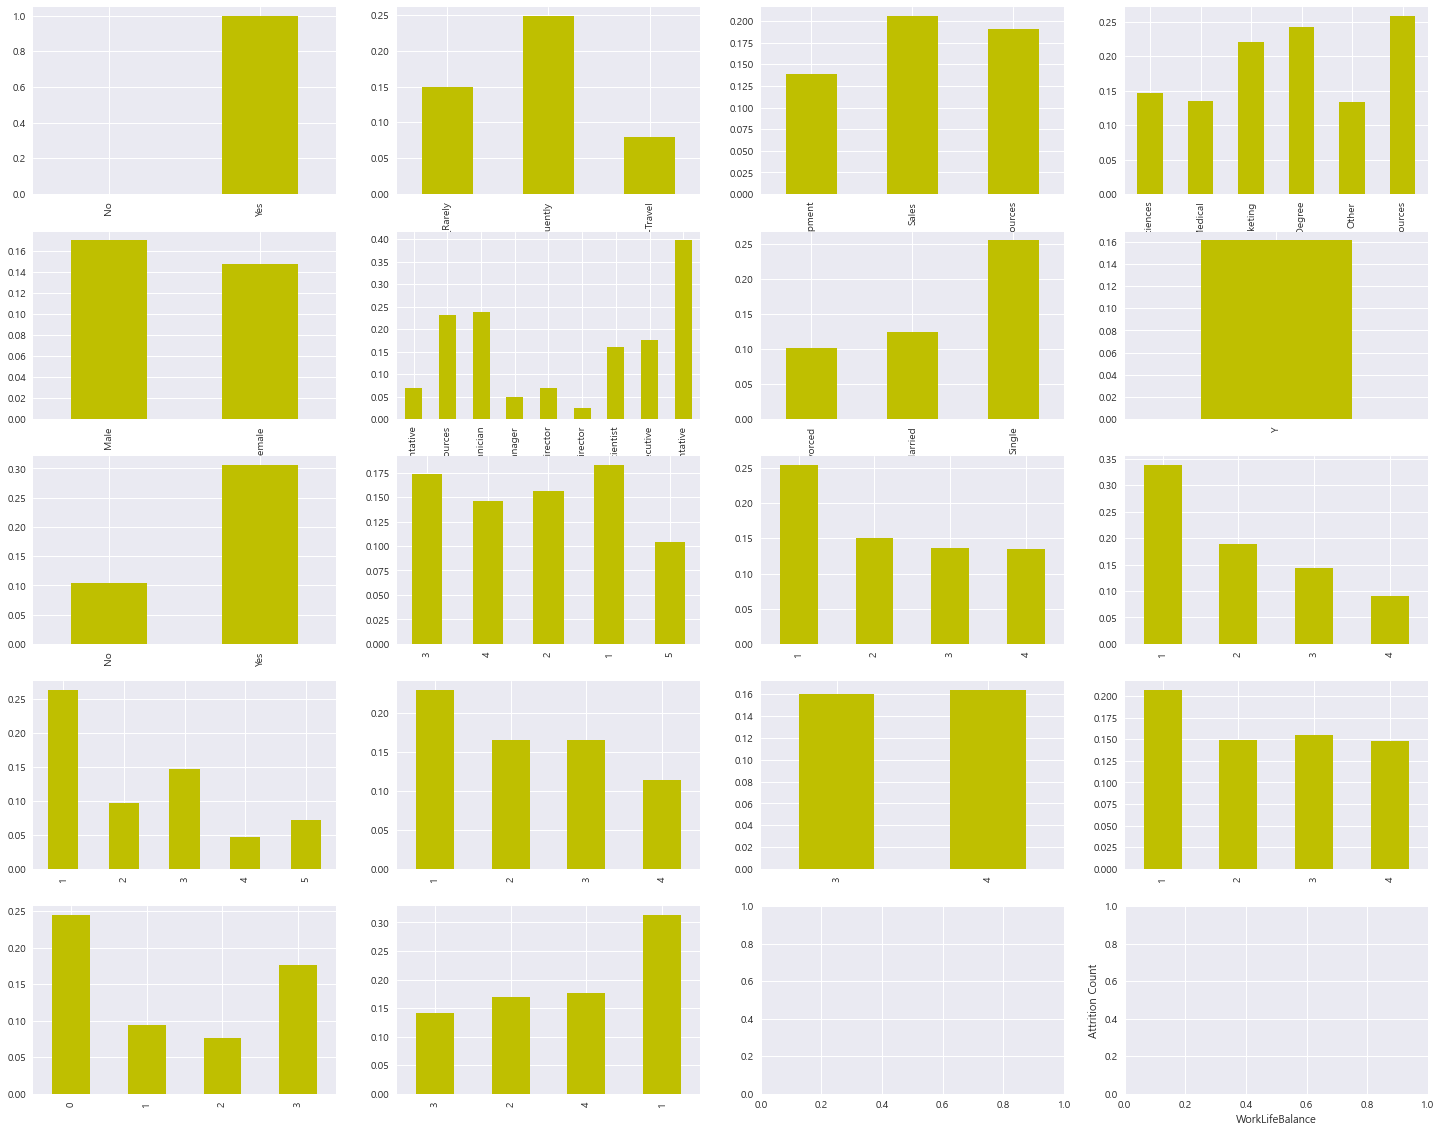

In [515]:
f, axes = plt.subplots(5, 4, figsize = (25, 20))

i = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4]
j = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1]

x=0
y=0
for col in discrete:
    (att_df[col].value_counts()/original[col].value_counts()).plot(kind='bar', color='y', ax=axes[i[x],j[y]])
#     plt.title('Percentage of people retired from the '+col, fontweight='bold')
    plt.ylabel('Attrition Count')
    plt.xlabel(col)
    x+=1
    y+=1

In [260]:
for col in discrete:
    perc = att_df[col].value_counts()/original[col].value_counts()
    print(style.BOLD + col +'의' + ' 퇴직율 높은 순' + style.END, '\n')
    print(perc.sort_index(ascending=False).sort_values(ascending=False))
    print('\n')

BusinessTravel의 퇴직율 높은 순 

Travel_Frequently    0.249097
Travel_Rarely        0.149569
Non-Travel           0.080000
Name: BusinessTravel, dtype: float64


Department의 퇴직율 높은 순 

Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Department, dtype: float64


EducationField의 퇴직율 높은 순 

Human Resources     0.259259
Technical Degree    0.242424
Marketing           0.220126
Life Sciences       0.146865
Medical             0.135776
Other               0.134146
Name: EducationField, dtype: float64


Gender의 퇴직율 높은 순 

Male      0.170068
Female    0.147959
Name: Gender, dtype: float64


JobRole의 퇴직율 높은 순 

Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            

### Chi-Squared Test
* H0(귀무가설) : Attrition과 feature는 연관이 없다.
* H1(대립가설) : Attrition과 feature는 연관이 있다.
* 신뢰도 : 95 %

In [443]:
chi_data = pd.crosstab(original['Attrition'], original[col])
chi_data

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [474]:
discrete_exc = copy.deepcopy(discrete)
discrete_exc.remove('Attrition')

for col in discrete_exc:
    chi_data = pd.crosstab(original['Attrition'], original[col])

    chi, p_value, _, _ = stats.chi2_contingency(chi_data, correction=False)
    print(style.BOLD +'* y ~ %s' %col + style.END)
    print('Chi-Squared p-value:', round(p_value,4))
    if p_value < 0.05:
        print('Attrition과 ', col, '은 연관이 있다')
    else:
        print('Attrition과 ', col, '은 연관이 없다')
    
    print('\n')

* y ~ BusinessTravel
Chi-Squared p-value: 0.0
Attrition과  BusinessTravel 은 연관이 있다


* y ~ Department
Chi-Squared p-value: 0.0045
Attrition과  Department 은 연관이 있다


* y ~ EducationField
Chi-Squared p-value: 0.0068
Attrition과  EducationField 은 연관이 있다


* y ~ Gender
Chi-Squared p-value: 0.2588
Attrition과  Gender 은 연관이 없다


* y ~ JobRole
Chi-Squared p-value: 0.0
Attrition과  JobRole 은 연관이 있다


* y ~ MaritalStatus
Chi-Squared p-value: 0.0
Attrition과  MaritalStatus 은 연관이 있다


* y ~ Over18
Chi-Squared p-value: 1.0
Attrition과  Over18 은 연관이 없다


* y ~ OverTime
Chi-Squared p-value: 0.0
Attrition과  OverTime 은 연관이 있다


* y ~ Education
Chi-Squared p-value: 0.5455
Attrition과  Education 은 연관이 없다


* y ~ EnvironmentSatisfaction
Chi-Squared p-value: 0.0001
Attrition과  EnvironmentSatisfaction 은 연관이 있다


* y ~ JobInvolvement
Chi-Squared p-value: 0.0
Attrition과  JobInvolvement 은 연관이 있다


* y ~ JobLevel
Chi-Squared p-value: 0.0
Attrition과  JobLevel 은 연관이 있다


* y ~ JobSatisfaction
Chi-Squared p-value: 0.0006

##### 귀무가설을 기각할 수 있는 경우
* 예) y ~ WorkLifeBalance

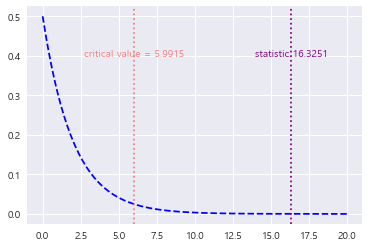

In [478]:
from numpy import linspace
from scipy.stats import chi2

chi_data = pd.crosstab(original['Attrition'], original['WorkLifeBalance'])
chi, p_value, _, _ = stats.chi2_contingency(chi_data, correction=False)

df=2
x = linspace(0, 20, 201)
y = chi2(df).pdf(x)

x95  = chi2(df).ppf(.95)
plt.plot(x,y,'b--')

plt.axvline(x=x95, color='lightcoral', linestyle=':') 
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)), horizontalalignment='center',color='lightcoral') 

plt.axvline(x=chi, color='purple', linestyle=':') 
plt.text(chi, .4, 'statistic '+ str(round(chi, 4)), horizontalalignment='center', color='purple') 
plt.show()


statistic이 critical value(임계치)보다 오른쪽에 위치하므로 귀무가설을 기각할 수 있다. <br>
--> Attrition(y)과 WorkLifeBalance(x)는 연관이 있다.

##### 귀무가설을 기각할 수 없는 경우
* 예) y ~ Education

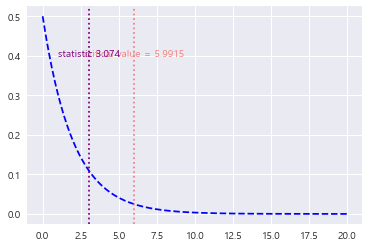

In [479]:
from numpy import linspace
from scipy.stats import chi2

chi_data = pd.crosstab(original['Attrition'], original['Education'])
chi, p_value, _, _ = stats.chi2_contingency(chi_data, correction=False)

df=2
x = linspace(0, 20, 201)
y = chi2(df).pdf(x)

x95  = chi2(df).ppf(.95)
plt.plot(x,y,'b--')

plt.axvline(x=x95, color='lightcoral', linestyle=':') 
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)), horizontalalignment='center',color='lightcoral') 

plt.axvline(x=chi, color='purple', linestyle=':') 
plt.text(chi, .4, 'statistic '+ str(round(chi, 4)), horizontalalignment='center', color='purple') 
plt.show()


statistic이 critical value(임계치)보다 왼쪽에 위치하므로 귀무가설을 기각할 수 없다. <br>
--> Attrition(y)과 Education(x)은 연관이 없다.

**<높은 퇴직율의 조건 - 이산형 변수>** <br>
* 영업 부서 <br>
* 휴먼리소스 분야 <br>
* sales representative 직무 <br>
* 미혼 <br>
* 야근 <br>
* 출장을 자주 갈수록 <br>
* 환경 만족도가 낮을수록 <br>
* 업무 참여도가 낮을수록 <br>
* 업무 난이도가 낮을수록 <br>
* 직업 만족도가 낮을수록 <br>
* 스톡옵션 정도가 낮을수록 <br>
* 워라벨이 낮을수록 <br>
<br>
* ~~남성~~<br>
* ~~18세 이상 <br>~~
* ~~학력이 낮을수록 <br>~~
* ~~업무 성과가 낮을수록 <br>~~
* ~~인간관계 만족도가 낮을수록 <br>~~

### 연속 ~ 연속

In [35]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [39]:
data[cor_list]

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,5993,8,11,8,0,6,4,0,5
1,49,8,5130,1,23,10,3,10,7,1,7
2,37,2,2090,6,15,7,3,0,0,0,0
3,33,3,2909,1,11,8,3,8,7,3,0
4,27,2,3468,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2571,4,17,17,3,5,2,0,3
1466,39,6,9991,4,15,9,5,7,7,1,7
1467,27,4,6142,1,20,6,0,6,2,0,3
1468,49,2,5390,2,14,17,3,9,6,0,8


In [86]:
import itertools
erase_list = ['DailyRate', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked']
new_numerical = list(set(numerical) - set(erase_list))
numerical_combinations = list(itertools.combinations((new_numerical),2))
print(len(numerical_combinations))

45


In [103]:
def draw_scatter(x,y):
    plt.scatter(data[x], data[y])
    plt.title(x+'~'+y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def coef(x,y):
    coef = np.corrcoef(data[x], data[y])[0,1]
    p_value = stats.pearsonr(data[x], data[y])[1]
    
    print('< '+x+'~'+y+' >')
    print('correlation:', round(coef,3))
    print('p-value:', round(p_value,5))
    
    if p_value < 0.5:
        print("유의함")
    else:
        print("유의하지 않음")

In [466]:
cor_list = []
pos_corr = []
neg_corr = []

for i in numerical_combinations:
    x = i[0]
    y = i[1]
    coef = np.corrcoef(data[x], data[y])[0,1]
    p_value = stats.pearsonr(data[x], data[y])[1]
    
#     print('< '+x+'~'+y+' >')
    print(style.BOLD +'* %s ~ %s' %(x,y) + style.END)

    print('correlation:', round(coef,3))
    print('p-value:', round(p_value,5))
    
    if p_value < 0.05:
        cor_list.append(i)
        print("유의함")
        if coef > 0:
            pos_corr.append(i)
            print('양의 상관관계')
        elif coef < 0:
            neg_corr.append(i)
            print('음의 상관관계')
    else:
        print("유의하지 않음")
    print('\n')

* TotalWorkingYears ~ PercentSalaryHike
correlation: -0.021
p-value: 0.42979
유의하지 않음


* TotalWorkingYears ~ TrainingTimesLastYear
correlation: -0.036
p-value: 0.17176
유의하지 않음


* TotalWorkingYears ~ Age
correlation: 0.68
p-value: 0.0
유의함
양의 상관관계


* TotalWorkingYears ~ DistanceFromHome
correlation: 0.005
p-value: 0.85927
유의하지 않음


* TotalWorkingYears ~ YearsAtCompany
correlation: 0.628
p-value: 0.0
유의함
양의 상관관계


* TotalWorkingYears ~ YearsSinceLastPromotion
correlation: 0.405
p-value: 0.0
유의함
양의 상관관계


* TotalWorkingYears ~ MonthlyIncome
correlation: 0.773
p-value: 0.0
유의함
양의 상관관계


* TotalWorkingYears ~ YearsWithCurrManager
correlation: 0.459
p-value: 0.0
유의함
양의 상관관계


* TotalWorkingYears ~ YearsInCurrentRole
correlation: 0.46
p-value: 0.0
유의함
양의 상관관계


* PercentSalaryHike ~ TrainingTimesLastYear
correlation: -0.005
p-value: 0.84147
유의하지 않음


* PercentSalaryHike ~ Age
correlation: 0.004
p-value: 0.8893
유의하지 않음


* PercentSalaryHike ~ DistanceFromHome
correlation: 0.04
p-value: 0.1230

모호한 변수 제거 후 수치형 변수끼리의 상관계수를 계산하였다.
이를 통해 구한 귀무가설을 기각할 수 있는 변수 조합에 대해 cor_list에 저장하였다.

In [111]:
print('총 상관관계 조합:', len(cor_list))
print('양의 상관관계:', len(pos_corr))
print(cor_list)

총 상관관계 조합: 21
양의 상관관계: 21
[('TotalWorkingYears', 'Age'), ('TotalWorkingYears', 'YearsAtCompany'), ('TotalWorkingYears', 'YearsSinceLastPromotion'), ('TotalWorkingYears', 'MonthlyIncome'), ('TotalWorkingYears', 'YearsWithCurrManager'), ('TotalWorkingYears', 'YearsInCurrentRole'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'MonthlyIncome'), ('Age', 'YearsWithCurrManager'), ('Age', 'YearsInCurrentRole'), ('YearsAtCompany', 'YearsSinceLastPromotion'), ('YearsAtCompany', 'MonthlyIncome'), ('YearsAtCompany', 'YearsWithCurrManager'), ('YearsAtCompany', 'YearsInCurrentRole'), ('YearsSinceLastPromotion', 'MonthlyIncome'), ('YearsSinceLastPromotion', 'YearsWithCurrManager'), ('YearsSinceLastPromotion', 'YearsInCurrentRole'), ('MonthlyIncome', 'YearsWithCurrManager'), ('MonthlyIncome', 'YearsInCurrentRole'), ('YearsWithCurrManager', 'YearsInCurrentRole')]


'TotalWorkingYears','Age','YearsAtCompany','YearsSinceLastPromotion','MonthlyIncome','YearsWithCurrManager','YearsInCurrentRole' <br> 
변수들의 조합을 확인해본 결과, 조합을 구성하는 7개의 원소들이 모두 각자 서로 유의한 양의 상관관계임을 확인할 수 있었다.

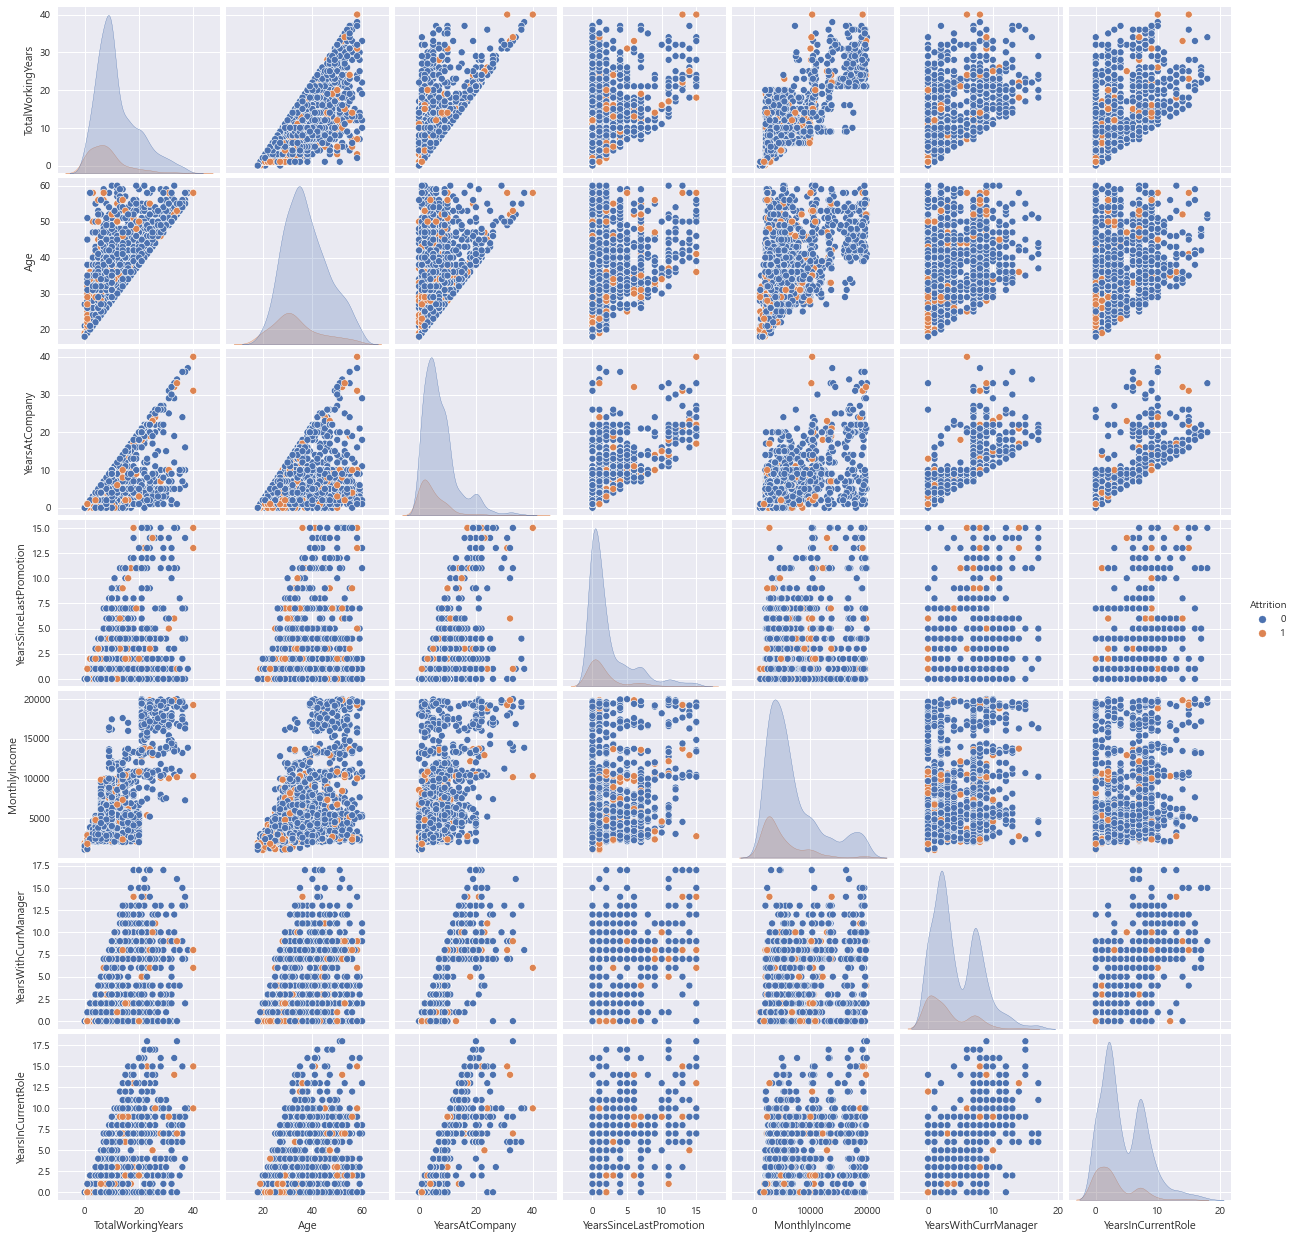

In [156]:
relation_value = ['TotalWorkingYears', 'Age', 'YearsAtCompany','YearsSinceLastPromotion','MonthlyIncome','YearsWithCurrManager','YearsInCurrentRole', 'Attrition']
df = data[relation_value]
sns.pairplot(df, hue='Attrition', palette='deep')
plt.show()

주황: 이직한 사람

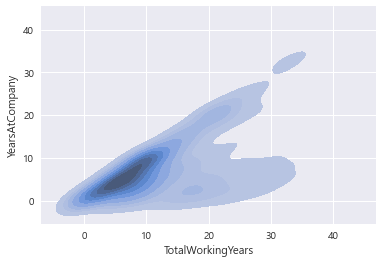

In [525]:
# 2차원 밀집도 그래프
sns.kdeplot(data[col[0]],data[col[1]], shade=True)

In [137]:
data[relation_value].corr()

,TotalWorkingYears,Age,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole
TotalWorkingYears,1.000000,0.680381,0.628133,0.404858,0.772893,0.459188,0.460365
Age,0.680381,1.000000,0.311309,0.216513,0.497855,0.202089,0.212901
YearsAtCompany,0.628133,0.311309,1.000000,0.618409,0.514285,0.769212,0.758754
YearsSinceLastPromotion,0.404858,0.216513,0.618409,1.000000,0.344978,0.510224,0.548056
MonthlyIncome,0.772893,0.497855,0.514285,0.344978,1.000000,0.344079,0.363818
YearsWithCurrManager,0.459188,0.202089,0.769212,0.510224,0.344079,1.000000,0.714365
YearsInCurrentRole,0.460365,0.212901,0.758754,0.548056,0.363818,0.714365,1.000000


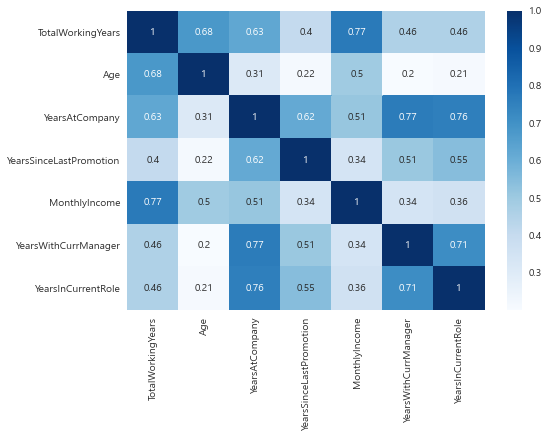

In [136]:
sns.heatmap(data[relation_value].corr(),cmap='Blues',annot=True)
plt.show()

각 변수끼리는 모두 양의 상관계수를 가진 것을 확인할 수 있다.
대표적으로 가장 높은 상관계수가 나타난 경우로 예를 들어보면, 경력이 길수록 월급이 많고 IBM에서 오래 재직했을수록 현재 관리자와 일한 기간과 현재 직무를 맡은 기간이 길었다. (역 성립)

### Log 변환

In [392]:
for col in relation_value:
    log_col = 'Log_' + col
    data[log_col] = np.log1p(data[col])

Skewness(왜도) : 1.765  to  -0.208


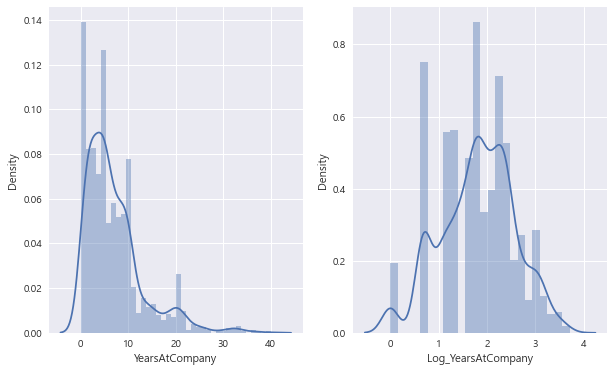

In [393]:
f, axes = plt.subplots(1, 2, figsize = (10, 6))

sns.distplot(data['YearsAtCompany'], ax=axes[0])
sns.distplot(data['Log_YearsAtCompany'], ax=axes[1])

print("Skewness(왜도) : {:.3f}".format(data['YearsAtCompany'].skew()),' to ', "{:.3f}".format(data['Log_YearsAtCompany'].skew()))


In [402]:
log_combinations = list(itertools.combinations((log_value),2))

In [471]:
log_cor_list = []
log_pos_corr = []
log_neg_corr = []

for i in log_combinations:
    x = i[0]
    y = i[1]
    coef = np.corrcoef(data[x], data[y])[0,1]
    p_value = stats.pearsonr(data[x], data[y])[1]
    
    print(style.BOLD +'* %s ~ %s' %(x,y) + style.END)
    print('correlation:', round(coef,3))
    print('p-value:', round(p_value,5))
    
    if p_value < 0.05:
        cor_list.append(i)
        print("유의함")
        if coef > 0:
            pos_corr.append(i)
            print('양의 상관관계')
        elif coef < 0:
            neg_corr.append(i)
            print('음의 상관관계')
    else:
        print("유의하지 않음")
    print('\n')

* Log_TotalWorkingYears ~ Log_Age
correlation: 0.68
p-value: 0.0
유의함
양의 상관관계


* Log_TotalWorkingYears ~ Log_YearsAtCompany
correlation: 0.619
p-value: 0.0
유의함
양의 상관관계


* Log_TotalWorkingYears ~ Log_YearsSinceLastPromotion
correlation: 0.371
p-value: 0.0
유의함
양의 상관관계


* Log_TotalWorkingYears ~ Log_MonthlyIncome
correlation: 0.733
p-value: 0.0
유의함
양의 상관관계


* Log_TotalWorkingYears ~ Log_YearsWithCurrManager
correlation: 0.501
p-value: 0.0
유의함
양의 상관관계


* Log_TotalWorkingYears ~ Log_YearsInCurrentRole
correlation: 0.501
p-value: 0.0
유의함
양의 상관관계


* Log_Age ~ Log_YearsAtCompany
correlation: 0.297
p-value: 0.0
유의함
양의 상관관계


* Log_Age ~ Log_YearsSinceLastPromotion
correlation: 0.202
p-value: 0.0
유의함
양의 상관관계


* Log_Age ~ Log_MonthlyIncome
correlation: 0.504
p-value: 0.0
유의함
양의 상관관계


* Log_Age ~ Log_YearsWithCurrManager
correlation: 0.202
p-value: 0.0
유의함
양의 상관관계


* Log_Age ~ Log_YearsInCurrentRole
correlation: 0.211
p-value: 0.0
유의함
양의 상관관계


* Log_YearsAtCompany ~ Log_YearsSinceLastProm

로그 변환 후 상관계수가 변환 전에 비해 전체적으로 높아진 것을 확인할 수 있었다.

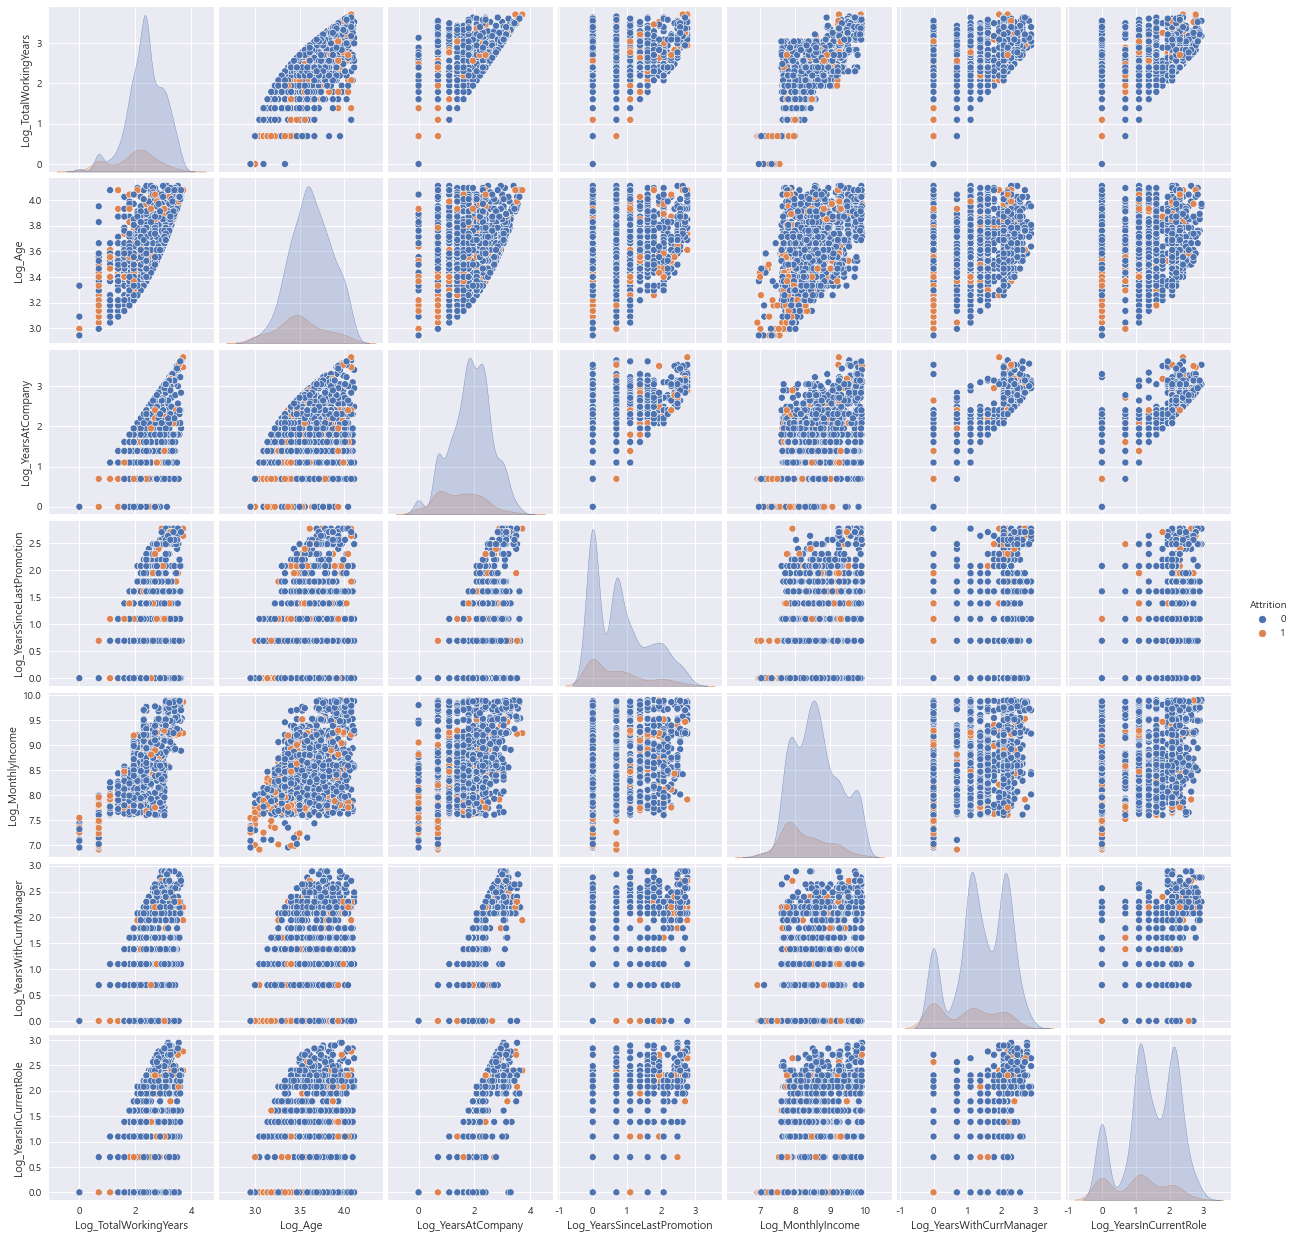

In [395]:
log_value = ['Log_TotalWorkingYears', 'Log_Age', 'Log_YearsAtCompany','Log_YearsSinceLastPromotion','Log_MonthlyIncome','Log_YearsWithCurrManager','Log_YearsInCurrentRole', 'Attrition']
df = data[log_value]
sns.pairplot(df, hue='Attrition', palette='deep')
plt.show()

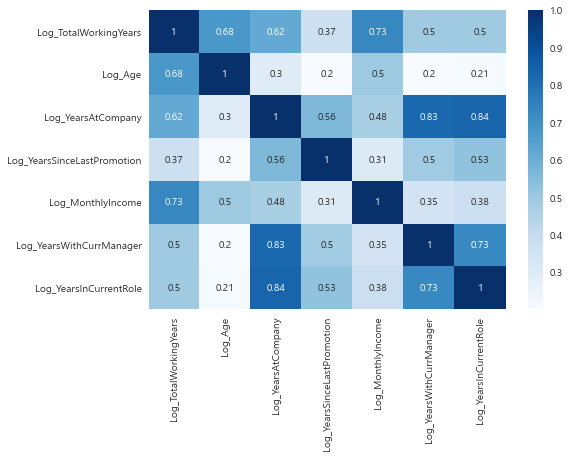

In [404]:
sns.heatmap(data[log_value].corr(),cmap='Blues',annot=True)
plt.show()

### 이산 ~ 연속

### T-Test 검정
* H0 (귀무가설): 퇴직한 사람과 퇴직하지 않은 사람의 feature 평균은 같다.
* H1 (대립가설): 퇴직한 사람과 퇴직하지 않은 사람의 feature 평균은 같지 않다.

In [470]:
print('퇴직한 사람과 퇴직하지 않은 사람의...', '\n')

for col in numerical:
    attr_yes = data[data['Attrition']==1][col]
    attr_no = data[data['Attrition']==0][col]
    p_value = stats.ttest_ind(attr_yes, attr_no)[1]
    
    print(style.BOLD +'* y ~ %s' %col + style.END)

    print('t-test p-value: %.4f' %(p_value))
#     print('< p-value of Attrition and ' + style.BOLD +'%s' %col + style.END + ': %.4f' %p_value, ' >')
    if p_value < 0.05:
        print(col +'의 평균에는 ' + style.BOLD + '차이가 있다.' + style.END)
    else:
        print(col +'의 평균은 ' + style.BOLD +'같다.' + style.END)

    print('\n')

퇴직한 사람과 퇴직하지 않은 사람의... 

* y ~ Age
t-test p-value: 0.0000
Age의 평균에는 차이가 있다.


* y ~ DailyRate
t-test p-value: 0.0299
DailyRate의 평균에는 차이가 있다.


* y ~ DistanceFromHome
t-test p-value: 0.0028
DistanceFromHome의 평균에는 차이가 있다.


* y ~ HourlyRate
t-test p-value: 0.7931
HourlyRate의 평균은 같다.


* y ~ MonthlyIncome
t-test p-value: 0.0000
MonthlyIncome의 평균에는 차이가 있다.


* y ~ MonthlyRate
t-test p-value: 0.5611
MonthlyRate의 평균은 같다.


* y ~ NumCompaniesWorked
t-test p-value: 0.0955
NumCompaniesWorked의 평균은 같다.


* y ~ PercentSalaryHike
t-test p-value: 0.6056
PercentSalaryHike의 평균은 같다.


* y ~ TotalWorkingYears
t-test p-value: 0.0000
TotalWorkingYears의 평균에는 차이가 있다.


* y ~ TrainingTimesLastYear
t-test p-value: 0.0226
TrainingTimesLastYear의 평균에는 차이가 있다.


* y ~ YearsAtCompany
t-test p-value: 0.0000
YearsAtCompany의 평균에는 차이가 있다.


* y ~ YearsInCurrentRole
t-test p-value: 0.0000
YearsInCurrentRole의 평균에는 차이가 있다.


* y ~ YearsSinceLastPromotion
t-test p-value: 0.2058
YearsSinceLastPromotion의 평균은 같다.


* y ~ Yea

##### 귀무가설이 기각된 경우

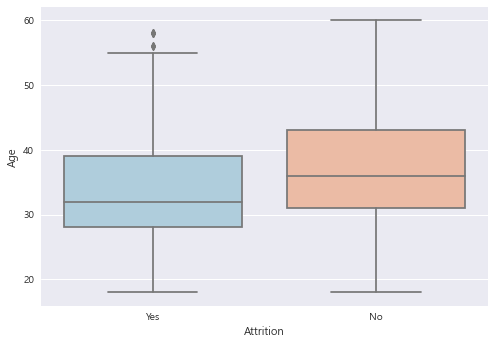

In [349]:
sns.boxplot(x=original['Attrition'], y=original['Age'], data=original, palette='RdBu_r')

##### 귀무가설이 기각되지 않은 경우

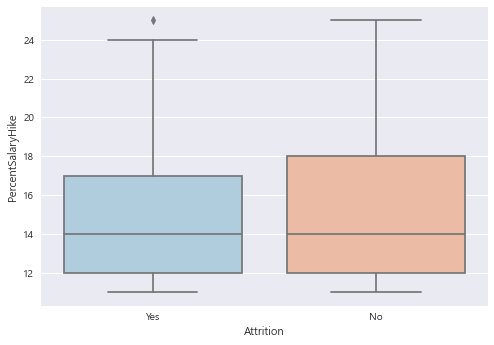

In [348]:
sns.boxplot(x=original['Attrition'], y=original['PercentSalaryHike'], data=original, palette='RdBu_r')

**<높은 퇴직율에 영향을 미치는 수치형 변수>** <br>
* Age <br>
* DailyRate <br>
* DistanceFromHome <br>
* MonthlyIncome <br>
* TotalWorkingYears <br>
* YearsAtCompany <br>
* TrainingTimesLastYear <br>
* YearsInCurrentRole <br>
* YearsWithCurrManager <br>

* ~~HourlyRate <br>~~
* ~~MonthlyRate <br>~~
* ~~PercentSalaryHike <br>~~
* ~~YearsSinceLastPromotion <br>~~
